In [1]:
import tweepy
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files




/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
ckey = 'uX2j83l5Wn6AxZMOBGcDkyJH4'
csecret = 'Jd7U2hr84siWaIrgIR74SVCLpGb5UtQhEzInYuCQZDfjLaKJWY'
atoken = '327609255-iR8ht48bVLeSjKSIUOe7kYsIM6sxcXlK5g2hnpbG'
asecret = '37wIQRQTqk0dPfNbRpsy1ycxLaS5zhysRd3rCPZ5Fv344'

In [0]:
auth = tweepy.OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
# Load dataset Covid19 (20 000 tvitova)
tweet_df = pd.read_csv('/content/drive/My Drive/data/Covid19.csv')
tweet_df.head()

,Unnamed: 0,tweet_dt,topic,id,username,name,tweet,like_count,reply_count,retweet_count,retweeted
0,0,2020-04-28,Covid19,1255225297735204865,ByrnesChance,Chance 2020,@JoeBiden @HillaryClinton Seriously?!?!\nSame ...,0,0,0,False
1,1,2020-04-28,Covid19,1255225297529638915,covid_data,Coronavirus Stats,"COVID19 Stats for Austria as of April 28, 2020...",0,0,0,False
2,2,2020-04-28,Covid19,1255225297454194689,RandstadEngUS,Randstad Engineering,#COVID19 is putting a strain on businesses in ...,0,0,0,False
3,3,2020-04-28,Covid19,1255225295868702725,_sagesharp_,Sage Sharp,"CW #COVID19, state surveilence, and racism htt...",0,0,0,False
4,4,2020-04-28,Covid19,1255225295340294149,PLVerratti,Patricia V,This is not the “new normal” this is the old n...,0,0,0,False


In [5]:
tweet_df.drop(columns=['Unnamed: 0', 'tweet_dt', 'topic', 'id', 'username', 'name', 'like_count', 'reply_count', 'retweet_count', 'retweeted'])

,tweet
0,@JoeBiden @HillaryClinton Seriously?!?!\nSame ...
1,"COVID19 Stats for Austria as of April 28, 2020..."
2,#COVID19 is putting a strain on businesses in ...
3,"CW #COVID19, state surveilence, and racism htt..."
4,This is not the “new normal” this is the old n...
...,...
20073,In this time of #COVID19 &amp; high #unemploym...
20074,A top Shropshire doctor believes the coronavir...
20075,Many families are experiencing stress &amp; an...
20076,Risk and opportunity abound as the #coronaviru...


In [0]:
 #  Cleaning text
import re
import string

def clean_text(tweet):
    tweet = tweet.lower() # text lowercase
    tweet = re.sub('@[^\s]+', '', tweet) # remove usernames
    tweet = re.sub('\[.*?\]', '', tweet) # remove square brackets
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', tweet) # remove URLs
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet) # remove punctuation
    tweet = re.sub('\w*\d\w*', '', tweet) 
    tweet = re.sub('[‘’“”…]', '', tweet)
    tweet = re.sub('\n', '', tweet)
    return tweet

    
tweet = lambda x: clean_text(x)

In [7]:
data_clean = pd.DataFrame(tweet_df.tweet.apply(tweet))
data_clean

,tweet
0,seriouslysame old playbook by senior members...
1,stats for austria as of april total cases ne...
2,is putting a strain on businesses in every se...
3,cw state surveilence and racism
4,this is not the new normal this is the old nor...
...,...
20073,in this time of amp high unemployment congres...
20074,a top shropshire doctor believes the coronavir...
20075,many families are experiencing stress amp anxi...
20076,risk and opportunity abound as the coronavirus...


In [8]:
# Uklanjanje stopwords sa dodatnim recima (rt, retweet)
from nltk.corpus import stopwords
additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'), additional)

data_clean1 = pd.DataFrame(data_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (swords)])))
data_clean1

,tweet
0,seriouslysame old playbook senior members deep...
1,stats austria april total cases new cases tota...
2,putting strain businesses every sector healthc...
3,cw state surveilence racism
4,new normal old normal way humanity vast majori...
...,...
20073,time amp high unemployment congress mandate na...
20074,top shropshire doctor believes coronavirus may...
20075,many families experiencing stress amp anxiety ...
20076,risk opportunity abound coronavirus pandemic e...


In [9]:
tokens = pd.DataFrame(data_clean1['tweet'].apply(nltk.word_tokenize))
tokens.head()

,tweet
0,"[seriouslysame, old, playbook, senior, members..."
1,"[stats, austria, april, total, cases, new, cas..."
2,"[putting, strain, businesses, every, sector, h..."
3,"[cw, state, surveilence, racism]"
4,"[new, normal, old, normal, way, humanity, vast..."


In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
def lemmatize(s):
  s = [wnl.lemmatize(word) for word in s]
  return s
tokens= tokens.assign(lemmatize = tokens.tweet.apply(lambda x: lemmatize(x)))

In [11]:
tokens.head()

,tweet,lemmatize
0,"[seriouslysame, old, playbook, senior, members...","[seriouslysame, old, playbook, senior, member,..."
1,"[stats, austria, april, total, cases, new, cas...","[stats, austria, april, total, case, new, case..."
2,"[putting, strain, businesses, every, sector, h...","[putting, strain, business, every, sector, hea..."
3,"[cw, state, surveilence, racism]","[cw, state, surveilence, racism]"
4,"[new, normal, old, normal, way, humanity, vast...","[new, normal, old, normal, way, humanity, vast..."


In [12]:
from nltk.stem.porter import PorterStemmer 
stemmer = PorterStemmer() 
tokens['stemmer'] = tokens['lemmatize'].apply(lambda x: [stemmer.stem(i) for i in x])
tokens.head()

,tweet,lemmatize,stemmer
0,"[seriouslysame, old, playbook, senior, members...","[seriouslysame, old, playbook, senior, member,...","[seriouslysam, old, playbook, senior, member, ..."
1,"[stats, austria, april, total, cases, new, cas...","[stats, austria, april, total, case, new, case...","[stat, austria, april, total, case, new, case,..."
2,"[putting, strain, businesses, every, sector, h...","[putting, strain, business, every, sector, hea...","[put, strain, busi, everi, sector, healthcar, ..."
3,"[cw, state, surveilence, racism]","[cw, state, surveilence, racism]","[cw, state, surveil, racism]"
4,"[new, normal, old, normal, way, humanity, vast...","[new, normal, old, normal, way, humanity, vast...","[new, normal, old, normal, way, human, vast, m..."


In [13]:
# Spajanje tokena nazad
tokens['stemmer'] = tokens['stemmer'].apply(lambda x: ' '.join([w for w in x]))
tokens.head()

,tweet,lemmatize,stemmer
0,"[seriouslysame, old, playbook, senior, members...","[seriouslysame, old, playbook, senior, member,...",seriouslysam old playbook senior member deep s...
1,"[stats, austria, april, total, cases, new, cas...","[stats, austria, april, total, case, new, case...",stat austria april total case new case total d...
2,"[putting, strain, businesses, every, sector, h...","[putting, strain, business, every, sector, hea...",put strain busi everi sector healthcar busi fe...
3,"[cw, state, surveilence, racism]","[cw, state, surveilence, racism]",cw state surveil racism
4,"[new, normal, old, normal, way, humanity, vast...","[new, normal, old, normal, way, humanity, vast...",new normal old normal way human vast major hist


In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
# Analiza sentimenata NLTK Vader

def sentiment_analyze(stemmer):
  score = SentimentIntensityAnalyzer().polarity_scores(stemmer)
  neg = score['neg'] 
  pos = score['pos']
  neu = score['neu']

  return SentimentIntensityAnalyzer().polarity_scores(stemmer)



In [0]:
tokens['polarity']= tokens['stemmer'].apply(sentiment_analyze)

In [0]:
tokens['compound'] = tokens['polarity'].apply(lambda d:d['compound'])

In [18]:
tokens.head()

,tweet,lemmatize,stemmer,polarity,compound
0,"[seriouslysame, old, playbook, senior, members...","[seriouslysame, old, playbook, senior, member,...",seriouslysam old playbook senior member deep s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,"[stats, austria, april, total, cases, new, cas...","[stats, austria, april, total, case, new, case...",stat austria april total case new case total d...,"{'neg': 0.464, 'neu': 0.536, 'pos': 0.0, 'comp...",-0.8316
2,"[putting, strain, businesses, every, sector, h...","[putting, strain, business, every, sector, hea...",put strain busi everi sector healthcar busi fe...,"{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...",-0.1027
3,"[cw, state, surveilence, racism]","[cw, state, surveilence, racism]",cw state surveil racism,"{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'comp...",-0.6249
4,"[new, normal, old, normal, way, humanity, vast...","[new, normal, old, normal, way, humanity, vast...",new normal old normal way human vast major hist,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [0]:
tokens['sentiment'] = tokens['compound'].apply(lambda score: 'positive' if score>=0.05 else 'negative' if score<=-0.05 else 'neutral')

In [20]:
tokens.head()

,tweet,lemmatize,stemmer,polarity,compound,sentiment
0,"[seriouslysame, old, playbook, senior, members...","[seriouslysame, old, playbook, senior, member,...",seriouslysam old playbook senior member deep s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,"[stats, austria, april, total, cases, new, cas...","[stats, austria, april, total, case, new, case...",stat austria april total case new case total d...,"{'neg': 0.464, 'neu': 0.536, 'pos': 0.0, 'comp...",-0.8316,negative
2,"[putting, strain, businesses, every, sector, h...","[putting, strain, business, every, sector, hea...",put strain busi everi sector healthcar busi fe...,"{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...",-0.1027,negative
3,"[cw, state, surveilence, racism]","[cw, state, surveilence, racism]",cw state surveil racism,"{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'comp...",-0.6249,negative
4,"[new, normal, old, normal, way, humanity, vast...","[new, normal, old, normal, way, humanity, vast...",new normal old normal way human vast major hist,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


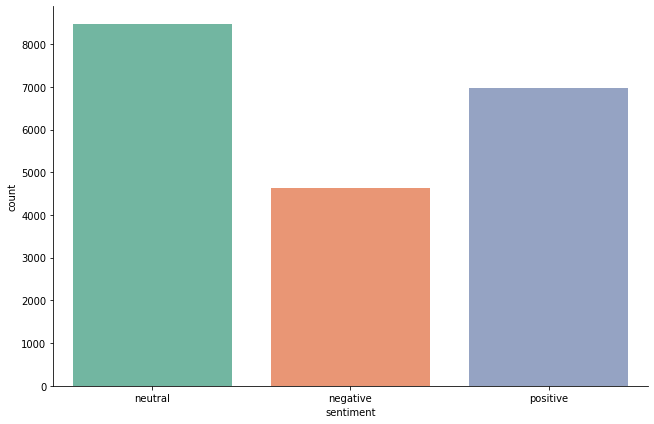

In [52]:
import seaborn as sns

sns.catplot(x='sentiment', data=tokens, kind="count", height=6, aspect=1.5, palette="Set2")
plt.show()

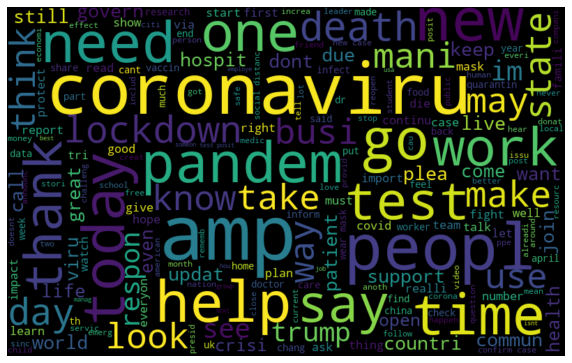

In [21]:
all_words = ' '.join([text for text in tokens['stemmer']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [0]:
tokens.to_csv('Sentiment.csv')
files.download('Sentiment.csv')

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics  import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
sentiment_counts = tokens.sentiment.value_counts()
print(sentiment_counts)

neutral     8459
positive    6978
negative    4641
Name: sentiment, dtype: int64


In [0]:
# Keep 4000 samples of the data as test set
test_set = tokens[:4000]

In [0]:
# Get training and validation data
X_train, X_val, y_train, y_val = train_test_split(tokens['stemmer'][4000:], 
                                                  tokens['sentiment'][4000:], 
                                                  test_size=0.2)

# Get sentiment labels for test set
y_test = test_set['sentiment']

In [0]:
# Create matrix based on word frequency in tweets
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(test_set['stemmer'])

In [29]:
print(f'Training size: {X_train.shape[0]} tweets\n\
Validation size: {X_val.shape[0]} tweets\n\
Test size: {X_test.shape[0]} tweets\n\
Amount of words (columns): {X_train.shape[1]} words')

Training size: 12862 tweets
Validation size: 3216 tweets
Test size: 4000 tweets
Amount of words (columns): 16347 words


In [61]:
# Multinomial Naive Bayes
multi_nb = MultinomialNB()
multi_nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
# Check results
train_pred = multi_nb.predict(X_train)
val_pred = multi_nb.predict(X_val)
print(f'Accuracy on training set (MultinomialNB): {round(accuracy_score(y_train, train_pred)*100, 2)}%')
print(f'Accuracy on validation set (MultinomialNB): {round(accuracy_score(y_val,val_pred)*100, 2)}%')

Accuracy on training set (MultinomialNB): 88.07%
Accuracy on validation set (MultinomialNB): 75.09%


In [58]:
# sklearn's Gradient Boosting Classifier (GBM)
gbm = GradientBoostingClassifier(n_estimators=200, 
                                 max_depth=6) 
                              
gbm.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
# Check results
train_pred = gbm.predict(X_train)
val_pred = gbm.predict(X_val)
print(f'Accuracy on training set (GBM): {round(accuracy_score(y_train, train_pred)*100, 2)}%')
print(f'Accuracy on validation set (GBM): {round(accuracy_score(y_val,val_pred)*100, 2)}%')

Accuracy on training set (GBM): 91.81%
Accuracy on validation set (GBM): 88.22%
